# Cuentas Falsas y Bots Usados Con Fines Políticos

## Reporte Inicial

## Recolección de tweets basada en cuentas (@) y Hashtags (#)

Usando el API de Twitter recoletamos **tweets publicados del el 27 de Noviembre al 4 de Diciembre de 2017**, que provengan de cuentas de pre-candidatos de los principales partidos políticos (ANR y PLRA), y/o contengan hashtags utilizados con fines electorales. Como base utilizamos las cuentas y hashtags publicados por el Diario Última Hora [Perfiles de pre-candidatos según las redes](http://elecciones.ultimahora.com/informacion/?id=20). Por ejemplo, Última Hora reporta que el hashtag **#JuntosPodemosMas** es utilizado para identificar tweets vínculados al candidatos Santiago Peña de Honor Colorado. Así mismo, **#MaritoDeLaGente** se utilzan en tweets publicados en favor del candidato del movimiento Colorado Añeteté. Según Última Hora, el hashtag **#EsAhora** aparece en los tweets relacionados al pre-candidato a la presidencia por el PLRA, Efraín Alegre.

[Aquí](https://docs.google.com/spreadsheets/d/1rOh-R5YVqdtTQY1sOnAAgRbkbHIu1qAHpZwgVmlBEtw/edit?usp=sharing) se puede acceder a lista completa de hashtags y cuentas.

## Tamaño del data set

In [35]:
%matplotlib inline

# Importing libraries
from db_manager import *
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('seaborn')

In [23]:
db = get_db()
print('Hemos recolectado {0} tweets y luego almacenados en una base de datos NoSQL (MongoDB) para facilitar su '\
      'análisis'.format(db.tweets.count()))

Hemos recolectado 16873 tweets y luego almacenados en una base de datos NoSQL (MongoDB) para facilitar su análisis


## Cantidad de Tweets por Interna

### ANR

In [14]:
tweets_anr = do_search(db, {'partido_politico': 'anr'})
print('Tweets relacionados a la interna ANR: {0}'.format(tweets_anr.count()))

Tweets relacionados a la interna ANR: 12876


### PLRA

In [15]:
tweets_plra = do_search(db, {'partido_politico': 'plra'})
print('Tweets relacionados a la interna PLRA: {0}'.format(tweets_plra.count()))

Tweets relacionados a la interna PLRA: 2297


Casi el 80% de los tweets colectados provienen de cuentas vinculadas a candidatos de la ANR y/o utilizan hashtags asociados a la campaña del partido colorado.

## Internas: ANR

En un primer momento nos enfocaremos en los tweets relacionados a la internas de la ANR por ser mayoría en el data set. Exploremos inicialmente la distribución de tweets considerando los dos movimiento más importantes en estas internas, es decir **Honor Colorado** y **Colorado Añeteté**.

## Distribución de tweets por movimiento

### Honor Colorado

In [57]:
tweets_hc = do_search(db, {'movimiento': 'honor colorado'})
print('Tweets relacionados al movimiento Honor Colorado: ' \
      '{0} ({1}% del total)'.format(tweets_hc.count(), round((tweets_hc.count()/tweets_anr.count())*100,2)))

Tweets relacionados al movimiento Honor Colorado: 7136 (55.42% del total)


### Colorado Añetete

In [54]:
tweets_ca = do_search(db, {'movimiento': 'colorado añetete'})
print('Tweets relacionados al movimiento Colorado Añeteté: ' \
      '{0} ({1}% del total)'.format(tweets_ca.count(), round((tweets_ca.count()/tweets_anr.count())*100,2)))

Tweets relacionados al movimiento Colora Añeteté: 5243 (40.72% del total)


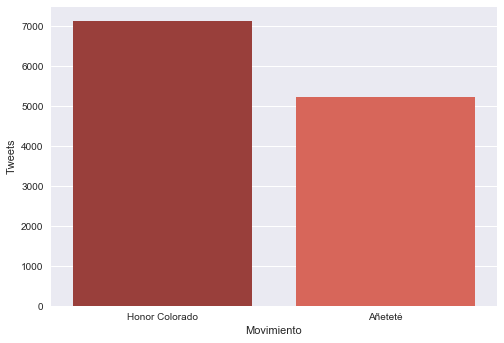

In [41]:
tweets_por_movimiento = pd.DataFrame({
    'Movimiento': ['Honor Colorado', 'Añeteté'],
    'Tweets': [tweets_hc.count(), tweets_ca.count()]
}, index=['hc', 'ca'])
sns.barplot(x='Movimiento', y='Tweets', data=tweets_por_movimiento, palette="Reds_d")

Los tweets relacionados al movimiento *Honor Colorado* constituyen el 55% de nuestro data set mientras que los vinculados a las candidaturas del movimiento *Colorado Añeteté* representan el 41% del total de datos. El restante porcentaje pertence a tweets vínculados a las internas pero no necesariamente a uno de estos dos movimiento, por ejemplo, tweets que utilizan solamente el hashtag **#InternasANR**.

## Distribución de tweets por candidato

### Santiago Peña

In [58]:
tweets_sp = do_search(db, {'candidatura': 'santiago peña'})
print('Tweets relacionados al candidato Santiago Peña: ' \
      '{0} ({1}% del total del movimiento HC)'.format(tweets_sp.count(), 
                                                      round((tweets_sp.count()/tweets_hc.count())*100,2)))

Tweets relacionados al candidato Santiago Peña: 3899 (54.64% del total del movimiento HC)


### Mario Abdo Benítez

In [59]:
tweets_ma = do_search(db, {'candidatura': 'mario abdo'})
print('Tweets relacionados al candidato Mario Abdo: ' \
      '{0} ({1}% del total del movimiento Colorado Añetetè)'.format(tweets_ma.count(), 
                                                      round((tweets_ma.count()/tweets_ca.count())*100,2)))

Tweets relacionados al candidato Mario Abdo: 4591 (87.56% del total del movimiento Colorado Añetetè)


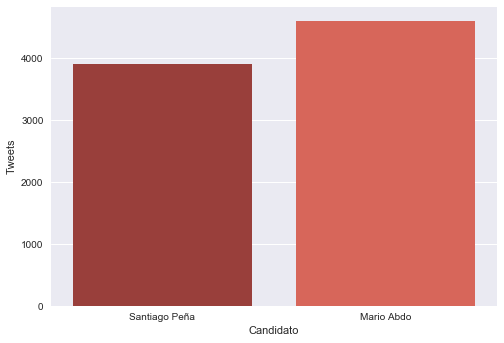

In [53]:
tweets_por_candidato = pd.DataFrame({
    'Candidato': ['Santiago Peña', 'Mario Abdo'],
    'Tweets': [tweets_sp.count(), tweets_ma.count()]
}, index=['sp', 'ma'])
sns.barplot(x='Candidato', y='Tweets', data=tweets_por_candidato, palette="Reds_d")

Este resultado es interesante. Muestra una diferencia de enfoques en las campañas en redes de ambos movimientos. **La campaña del movimiento *Colorado Añeteté* se centra mucho en el candidato a presidente Mario Abdo Benítez, casi el 90% de los tweets éstan vinculados al candidato**. Por otra parte, la campañan de *Honor Colorado* se enfoca más en el  movimiento en si y no tanto en Peña. Quizás el pasado liberal del candidato oficialista puede estar influenciando la estraegia de HC.

## Hashtags más populares usados por los movimientos

### Honor Colorado

In [70]:
hashtags_hc = get_hashtags_by_movement(db, 'honor colorado')
for hashtag in hashtags_hc:
    print('#{0}: {1} tweets ({2}% del total de HC)'.
          format(hashtag['_id'],hashtag['count'],round((hashtag['count']/tweets_hc.count())*100)))

#HonorColorado: 1637 tweets (23% del total de HC)
#JuntosPodemosMas: 1152 tweets (16% del total de HC)
#CaminandoJuntos: 541 tweets (8% del total de HC)
#SigamosConversando: 406 tweets (6% del total de HC)


### Colorado Añeteté

In [69]:
hashtags_ca = get_hashtags_by_movement(db, 'colorado añetete')
for hashtag in hashtags_ca:
    print('#{0}: {1} tweets ({2}% del total de Añeteté)'.
          format(hashtag['_id'],hashtag['count'],round((hashtag['count']/tweets_hc.count())*100)))

#ParaguayDeLaGente: 1700 tweets (24% del total de Añeteté)
#Lista3: 1600 tweets (22% del total de Añeteté)
#MaritoDeLaGente: 1291 tweets (18% del total de Añeteté)
#ColoradoAñetete: 358 tweets (5% del total de Añeteté)


Estos resultados son consistentes con los anteriores que muestran como **la campaña del movimiento HC está principalmente enfocada en dar promoción al movimiento antes que al candidato**.

## Cantidad de tuiteros por movimiento

### Honor Colorado

In [71]:
unique_users_hc = get_unique_users_by_movement(db, 'honor colorado')
print('{0} usuarios tuitean sobre Honor Colorado'.format(len(unique_users_hc)))

2260 usuarios tuitean sobre Honor Colorado


#### Top-10 más activos con sus actividades

In [73]:
top10_tuiteros_hc = []
for i in range(10):
    tuitero_hc = {'1.Usuario': unique_users_hc[i]['screen_name'], 
                  '2.Tweets': unique_users_hc[i]['tweets_count'],
                  '3.Originales': unique_users_hc[i]['original_count'],
                  '4.Retweets': unique_users_hc[i]['retweets_count'],
                  '5.Quotes': unique_users_hc[i]['quotes_count'],
                  '6.Replies': unique_users_hc[i]['replies_count']}
    top10_tuiteros_hc.append(tuitero_hc)
pd.DataFrame(top10_tuiteros_hc)

,1.Usuario,2.Tweets,3.Originales,4.Retweets,5.Quotes,6.Replies
0,ArturoO22734057,68,0,68,0,0
1,miryangonza,52,0,48,0,4
2,silvatadeo2,51,0,49,0,2
3,delgapy2016,51,0,51,0,0
4,Mariade84654356,50,0,50,0,0
5,saguierangel,49,0,48,0,1
6,alilebron45,49,0,48,0,1
7,Michelec1954,48,0,0,46,2
8,JudithGimnez2,48,0,47,0,1
9,aristiqui85,47,0,43,0,4


### Colorado Añeteté

In [74]:
unique_users_ca = get_unique_users_by_movement(db, 'colorado añetete')
print('{0} usuarios tuitean sobre Colorado Anetete'.format(len(unique_users_ca)))

916 usuarios tuitean sobre Colorado Anetete


#### Top-10 más activos y sus actividades

In [77]:
top10_tuiteros_ca = []
for i in range(10):
    tuitero_ca = {'1.Usuario': unique_users_ca[i]['screen_name'], 
                  '2.Tweets': unique_users_ca[i]['tweets_count'],
                  '3.Originales': unique_users_ca[i]['original_count'],
                  '4.Retweets': unique_users_ca[i]['retweets_count'],
                  '5.Quotes': unique_users_ca[i]['quotes_count'],
                  '6.Replies': unique_users_ca[i]['replies_count']}
    top10_tuiteros_ca.append(tuitero_ca)
pd.DataFrame(top10_tuiteros_ca)

,1.Usuario,2.Tweets,3.Originales,4.Retweets,5.Quotes,6.Replies
0,Paraguaynosune,339,0,339,0,0
1,jjrios_bogado,125,0,104,0,21
2,Solmelga,107,0,71,0,36
3,MichellMCord,80,0,65,9,6
4,Beatriz20D,75,0,75,0,0
5,MaritoAbdo,75,0,11,0,64
6,LaJusticierra,71,0,68,0,3
7,felixugarte,68,0,68,0,0
8,EDITHVILLA3,62,0,58,0,4
9,equipo_anetete,61,0,55,0,6


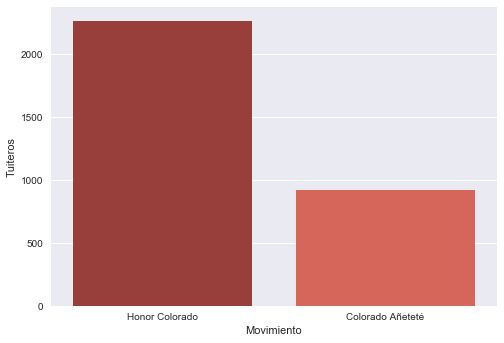

In [79]:
tuiteros_por_movimiento = pd.DataFrame({
    'Movimiento': ['Honor Colorado', 'Colorado Añeteté'],
    'Tuiteros': [len(unique_users_hc), len(unique_users_ca)]
}, index=['hc', 'ca'])
sns.barplot(x='Movimiento', y='Tuiteros', data=tuiteros_por_movimiento, palette="Reds_d")

Como podría haberse suponido el ejercito de tuiteros del movimiento *Honor Colorado* es ampliamente superior al del movimiento *Colorado Añeteté*. Prácticamente, **por cada tuitero de *Colorado Añeteté* existen 2.5 tuiteros de *Honor Colorado***. Sin embargo la diferencia en cantidad de tweets entre ambos movimiento no es muy importante, como vimos anteriormente, lo que demuestra que *Colorado Añeteté* tiene un ejercito más activo de tuiteros.

Otro aspecto destacable del último análisis es el tipo de actividad que realizan tanto los tuiteros de *Honor Colorado* como los de *Añeteté*. En ambos casos, **los tuiteros más activos no publican nuevo tweets** sino se limitan a casi exclusivamente a retuitear tweets vinculados a su movimiento. En otras palabras, la principal actividad de estos usuarios es amplificar y promocionar información relacionada a sus intereses. **Este comportamiento es típico de bots y cuentas falsas**. La siguiente tarea en el estudio debe consistir, por lo tanto, en análizar más en detalle el comportamiento de estas cuentas con el objetivo de verificar si son falsas o se encuentran vínculadas a sistemas automáticos de publicaciones. 